In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [11]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y

In [12]:
train_img=np.load('/home/user01/notebook/Mnist_Data/train_img.npy')
train_lab=np.load('/home/user01/notebook/Mnist_Data/train_lab.npy')
test_img=np.load('/home/user01/notebook/Mnist_Data/test_img.npy')
test_lab=np.load('/home/user01/notebook/Mnist_Data/test_lab.npy')
val_img=np.load('/home/user01/notebook/Mnist_Data/val_img.npy')
val_lab=np.load('/home/user01/notebook/Mnist_Data/val_lab.npy')

In [13]:
print np.shape(train_img)
np.shape(val_img)

(55000, 784)


(5000, 784)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


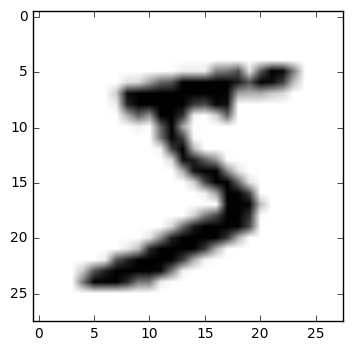

In [14]:
img=np.reshape(val_img[0] ,newshape=[28,28])
lab=val_lab[0]
print lab

plt.imshow(img, cmap='binary' )

In [15]:
#x_pre=tf.placeholder(tf.float32 , shape=[None,28,28,1])
#x_ = tf.reshape(x_pre , shape=[-1,28*28*1])
x_=tf.placeholder(tf.float32 , shape=[None,28*28*1])
y_=tf.placeholder(tf.float32 , shape=[None , 10])

In [16]:
#Layer1 without Batch Normalization  
w1_initial=np.random.normal(size=(28*28*1,10)).astype(np.float32)
w1 = tf.Variable(w1_initial)
mean_w1 = tf.reduce_mean(w1)
b1=tf.Variable(tf.zeros([10]))
z1=tf.matmul(x_,w1)+b1
l1=tf.nn.relu(z1)
print l1


Tensor("Relu_1:0", shape=(?, 10), dtype=float32)


In [17]:
y=tf.nn.softmax(l1)
cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step =tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_ , 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))

In [20]:
zs , acc= [],[]
init=tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [21]:
acc,zs,acc_val , zs_val,w1_mean_list =[],[],[],[],[]   
start_time=time.time()
for i in range(100000):

    batch_xs , batch_ys =next_batch( 60 , train_img , train_lab) 
    sess.run( train_step , feed_dict ={ x_: batch_xs , y_ :batch_ys })
    if i%100 is 0:
        train_res = sess.run([accuracy , z1 ] , feed_dict = {x_:batch_xs, y_ : batch_ys})
        val_res   = sess.run([accuracy , z1 ] , feed_dict = {x_:val_img, y_ : val_lab})
        mean   = sess.run(mean_w1 , feed_dict = {x_:val_img, y_ : val_lab})
        
        print 'step:',i, 'training',train_res[0],'           validation' , val_res[0] 
        acc.append(train_res[0])
        zs.append(np.mean(train_res[1] , axis=0))
        w1_mean_list.append(mean)
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1] , axis=0))            
end_time=time.time()
zs , val_zs , acc, acc_val = np.array(zs) , np.array(zs_val) , np.array(acc) , np.array(acc_val)
#when we test , through using above 4 parameter we get more higher accuracy 
test_res = sess.run([accuracy , z1 ] , feed_dict = {x_:test_img, y_ : test_lab})
print 'test accuracy : ' , test_res[0] 
print 'final output ' , test_res[1]
print 'The time taken by Training: ',end_time - start_time


step: 0 training 0.133333            validation 0.12
step: 100 training 0.15            validation 0.1776
step: 200 training 0.216667            validation 0.1992
step: 300 training 0.316667            validation 0.2136
step: 400 training 0.15            validation 0.2224
step: 500 training 0.15            validation 0.2314
step: 600 training 0.266667            validation 0.237
step: 700 training 0.2            validation 0.2444
step: 800 training 0.3            validation 0.2544
step: 900 training 0.333333            validation 0.258
step: 1000 training 0.233333            validation 0.2638
step: 1100 training 0.25            validation 0.2656
step: 1200 training 0.3            validation 0.2756
step: 1300 training 0.383333            validation 0.2796
step: 1400 training 0.333333            validation 0.285
step: 1500 training 0.3            validation 0.285
step: 1600 training 0.316667            validation 0.2998
step: 1700 training 0.283333            validation 0.3114
step: 1800

1000


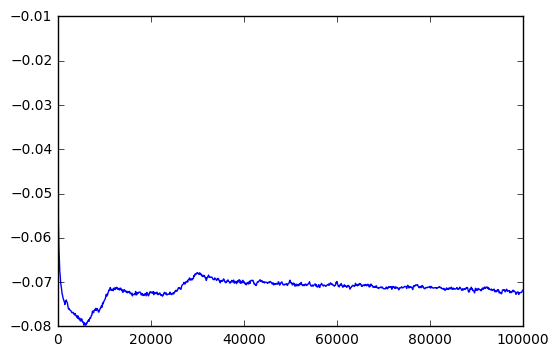

In [22]:
print len(w1_mean_list)
plt.plot(range(0,100000,100) , w1_mean_list)